# Seaborn

Simplifica la creación de gráficos, soporta DataFrames de `pandas`.

La integración con `matplotlib` no es tan completa.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from ipywidgets import interact
from scipy import stats

sns.set()

# Distribuciones unidimensionales

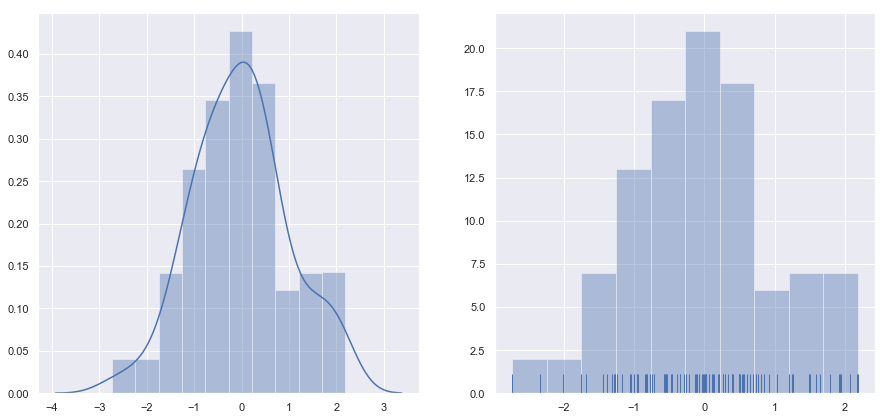

In [3]:
SEED = 3482756
np.random.seed(SEED)
x = np.random.normal(size=100)
(fig, ax) = plt.subplots(1, 2, figsize=(15, 7))

#####
sns.distplot(x, ax=ax[0]);  # dibuja por defecto el histograma y la densidad de kernel
sns.distplot(x, kde=False, rug=True);  # sin kde, pero con marcas por cada observación
#####

## Histogramas

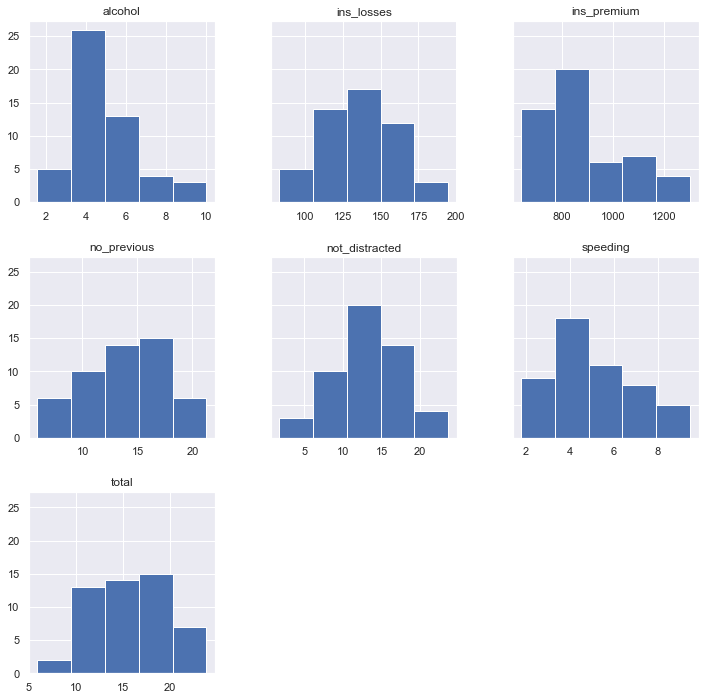

In [4]:
crashes = sns.load_dataset("car_crashes");
crashes.hist(figsize=(12, 12), bins=5, sharey=True);

# Distribuciones multivariable

## Scatterplot

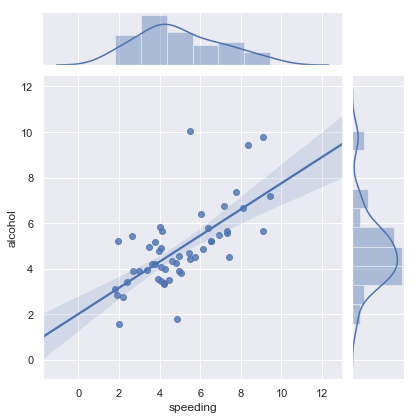

In [5]:
sns.jointplot("speeding", "alcohol", crashes, kind='reg', ci=90);  # confidence interval = 90%

### Alternativa con `matplotlib`:

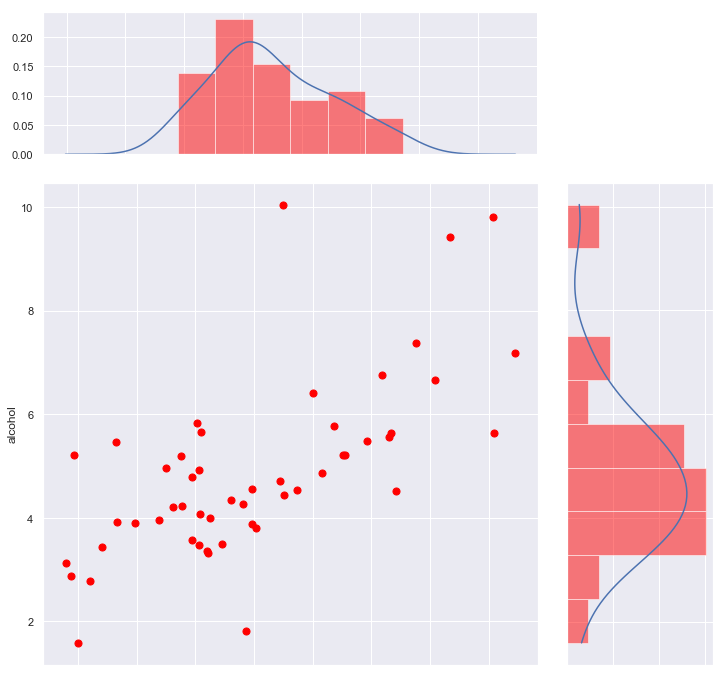

In [6]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

fig = plt.figure(1, figsize=[12, 12])
ax1 = plt.subplot2grid((4, 4), (1, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((4, 4), (0, 0), colspan=3)
ax3 = plt.subplot2grid((4, 4), (1, 3), rowspan=3)

crashes.plot.scatter(x='speeding', y='alcohol', ax=ax1, color='red', s=50)
crashes.plot.kde(y='speeding', ax=ax2, sharex=ax1, legend=None)
crashes.plot.hist(y='speeding', bins=6, ax=ax2, sharex=ax1, density=True, legend=None, alpha=.5, color='red')


ax2.set_ylabel('')
ax2.set_yticks=[]
ax2.set_yticklabels=[]

# No está soportado directamente el rotado en kde
kde_speeding = gaussian_kde(crashes.alcohol)
y = np.linspace(np.amin(crashes.alcohol), np.amax(crashes.alcohol), 100)
ax3.plot(kde_speeding(y), y)
crashes.plot.hist(y='alcohol',
                  ax=ax3,
                  sharey=ax1,
                  density=True,
                  legend=None,
                  orientation='horizontal',
                  alpha=.5,
                  color='red');


**Mucho más conveniente usar `seaborn`!!!**

## Hexbin

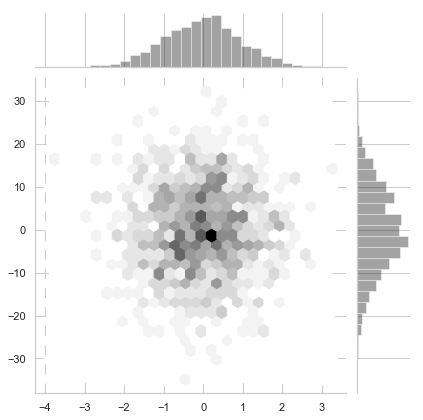

In [7]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

with sns.axes_style("whitegrid"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

## KDEplot

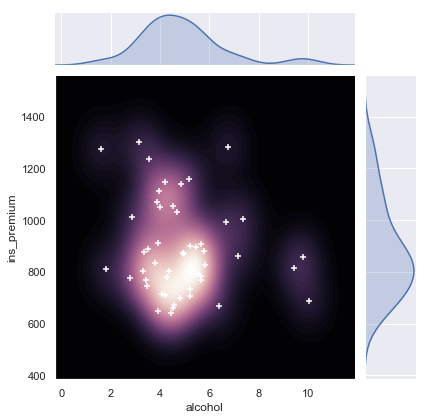

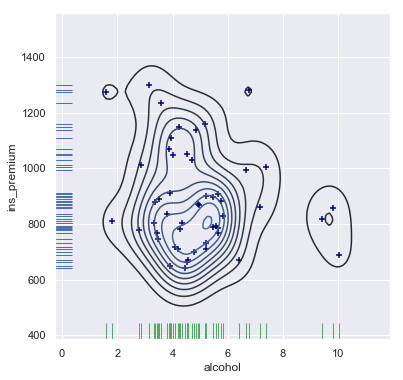

In [8]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
#####
g = sns.jointplot(x="alcohol", y="ins_premium", data=crashes, kind="kde", cmap=cmap, levels=60);
#####
g.plot_joint(plt.scatter, marker='+', color='white')


fig, ax = plt.subplots(figsize=(6, 6))
#####
g = sns.kdeplot(crashes.alcohol, crashes.ins_premium, ax=ax)
#####
g.scatter(crashes.alcohol, crashes.ins_premium, color='navy', marker='+')
sns.rugplot(crashes.alcohol, color="g", ax=ax)
sns.rugplot(crashes.ins_premium, vertical=True, ax=ax);

# Heatmaps

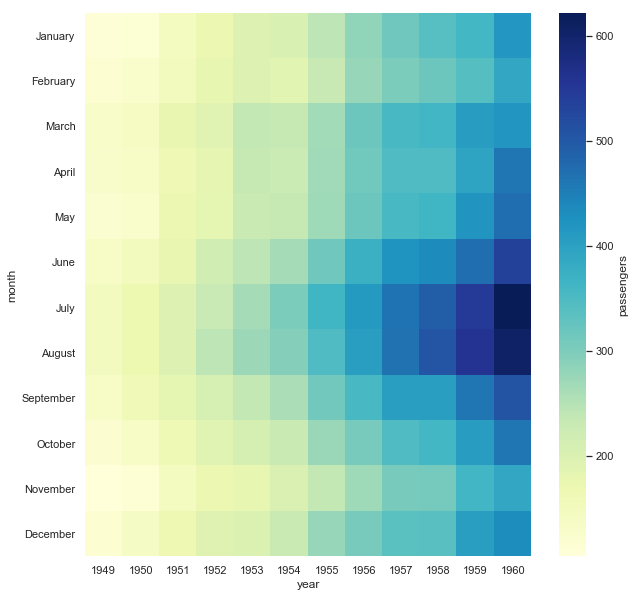

In [9]:
df = sns.load_dataset('flights')
flights = df.pivot("month", "year", "passengers")

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(flights, cmap="YlGnBu", ax=ax, cbar_kws={'label': 'passengers'});


## Datos categóricos

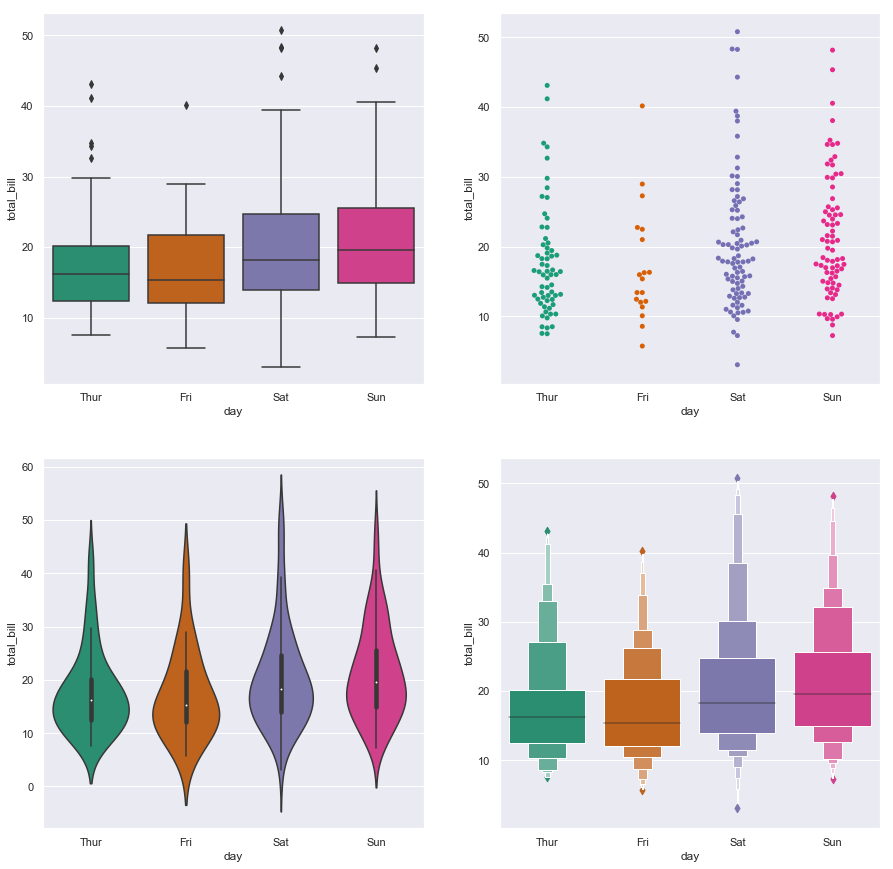

In [10]:
tips = sns.load_dataset("tips")


with sns.color_palette('Dark2'):
    fig, ax = plt.subplots(2, 2, figsize=(15, 15))
    sns.boxplot(x="day", y="total_bill", data=tips, ax=ax[0, 0])
    sns.swarmplot(x="day", y="total_bill", data=tips, ax=ax[0, 1])
    sns.violinplot(x="day", y="total_bill", data=tips, ax=ax[1, 0])
    sns.boxenplot(x="day", y="total_bill", data=tips, ax=ax[1, 1])

# Paleta de colores

En `seaborn` se establece la paleta de colores de la siguiente manera:

- Global:
~~~python
sns.set_palette(sns.color_palette('Reds'))
~~~

- Temporal:
~~~python
with sns.color_palette('Greens'):
    ...
~~~

  + También se puede establecer de forma temporal el estilo:

    ~~~python
    with sns.axes_style("ticks") and sns.color_palette("muted"):
        ...
    ~~~

> Más info: https://seaborn.pydata.org/tutorial/aesthetics.html

# Gráficos avanzados

In [11]:
tips = sns.load_dataset("tips")
categories = ['time', 'sex', 'day', 'smoker']
CI = 90  # 90% Confidence Interval

def interactive_sns_replot(by='time', ci=CI):
    data_by = tips.groupby(by=by)
    hue_style = "{}".format('sex' if by=='smoker' else 'smoker')
    (fig, ax) = plt.subplots(1, len(data_by), figsize=(8*len(data_by), 6))
    
    for (group, _ax) in zip(data_by, ax):
        #####
        g = sns.scatterplot(x="total_bill", y="tip",
                            hue=hue_style, style=hue_style, size="size", sizes=(0, 250),
                            data=group[1], ax=_ax)
        sns.regplot(x='total_bill', y='tip', data=group[1], scatter=False, ci=ci, ax=_ax)
        #####
        g.set_title(group[0])

def interactive_lmplot(by='time', ci=CI):
    hue_style = "{}".format('sex' if by=='smoker' else 'smoker')
    #####
    sns.lmplot(x='total_bill', y='tip', data=tips, col=by, hue=hue_style, ci=ci)
    #####

In [12]:
interact(interactive_sns_replot, by=categories, ci=(0, 100));

interactive(children=(Dropdown(description='by', options=('time', 'sex', 'day', 'smoker'), value='time'), IntS…

In [13]:
interact(interactive_lmplot, by=categories, ci=(0, 100));

interactive(children=(Dropdown(description='by', options=('time', 'sex', 'day', 'smoker'), value='time'), IntS…

In [14]:
def interactive_pairplot(by='smoker', regression=False, histogram=True):
    with sns.axes_style("ticks") and sns.color_palette("muted"):  # cambio de estilo temporal
        #####
        sns.pairplot(data=tips,
                     hue=by,
                     diag_kind='hist' if histogram else 'kde',
                     kind='reg' if regression else 'scatter')
        #####

interact(interactive_pairplot, by=categories, regression=False, histogram=True);

interactive(children=(Dropdown(description='by', index=3, options=('time', 'sex', 'day', 'smoker'), value='smo…

# Bokeh
## Gráficos interactivos simplificados

In [15]:
tt = sns.load_dataset('titanic')  # sns.get_dataset_names
tt.survived = tt.survived.apply(lambda k: 'green' if k else 'red')

In [16]:
tt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,red,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,green,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,green,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,green,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,red,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
# Bokeh libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import CDSView, ColumnDataSource, GroupFilter, HoverTool
from bokeh.layouts import gridplot
from bokeh.plotting import reset_output

# Use reset_output() between subsequent show() calls, as needed
reset_output()

# Prepare the data

source = ColumnDataSource(tt)

# Determine where the visualization will be rendered
output_notebook()  # Render inline in a Jupyter Notebook
view_m = CDSView(source=source, filters=[GroupFilter(column_name='sex', group='male')])
view_f = CDSView(source=source, filters=[GroupFilter(column_name='sex', group='female')])

# Specify the tools
plot_size_and_tools = {'plot_height': 300, 'plot_width': 300,
                        'tools':['lasso_select', 'reset', 'save', 'pan', 'wheel_zoom']}

# Create a figure relating the percentages
fig_all = figure(
    title='Viajeros del Titanic',
    x_axis_label='Edad', y_axis_label='Precio del billete',
    **plot_size_and_tools
)

fig_males = figure(
    title='Hombres',
    x_range=fig_all.x_range, y_range=fig_all.y_range,
    x_axis_label='Edad', y_axis_label='Precio del billete',
    **plot_size_and_tools
)

fig_females = figure(
    title='Mujeres',
    x_range=fig_all.x_range, y_range=fig_all.y_range,
    x_axis_label='Edad', y_axis_label='Precio del billete',
    **plot_size_and_tools
)


# Connect to and draw the data
fig_all.circle(x='age', y='fare', source=source,
               alpha=0.9, color='survived')

fig_males.circle(x='age', y='fare', source=source, view=view_m, color='survived')
fig_females.circle(x='age', y='fare', source=source, view=view_f, color='survived')


# Format the tooltip
tooltips = [
            ('Sexo','@sex'),
            ('Ciudad de embarque', '@embark_town'),
            ('Cubierta', '@deck'),
            ('Viaja sólo','@alone'),
           ]


# Add the HoverTool to the figure
fig_all.add_tools(HoverTool(tooltips=tooltips))

# Preview and save 
show(gridplot([[fig_all, None], [fig_males, fig_females]], sizing_mode='scale_width'))


Loading BokehJS ...